In [104]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
df = pd.read_parquet('/home/walml/repos/zoobot-predictions/data/euclid_karina/representations/convnext_nano_evo/representations_pca_20.parquet')
max_components = 20
pca_cols = [f'feat_pca_{i}' for i in range(max_components)]


# df = pd.read_parquet('/home/walml/repos/zoobot-predictions/data/euclid_karina/representations/convnext_nano_evo/representations.parquet')
# pca_cols = [f'feat_{i}' for i in range(100)]

df = df[['id_str'] + pca_cols]

In [106]:
df

,id_str,feat_pca_0,feat_pca_1,feat_pca_2,feat_pca_3,feat_pca_4,feat_pca_5,feat_pca_6,feat_pca_7,feat_pca_8,...,feat_pca_10,feat_pca_11,feat_pca_12,feat_pca_13,feat_pca_14,feat_pca_15,feat_pca_16,feat_pca_17,feat_pca_18,feat_pca_19
0,EUC_0342_DESI-sel,6.394430,-6.204380,-9.036237,2.310582,-6.270920,-5.924473,2.046276,-4.822285,2.522871,...,2.148692,-1.115477,-0.225682,0.928223,2.159402,-2.615739,2.809034,-0.190520,0.412836,0.010780
1,EUC_0348_DESI-sel,8.649072,0.438148,-7.491514,2.867835,-4.222080,-6.600177,-1.978871,-0.918318,3.587829,...,-0.133842,-0.373663,1.763108,1.135694,0.281274,-0.052049,0.583747,0.842282,2.051217,0.371916
2,EUC_0365_DESI-sel,6.940455,-6.355774,-9.189132,3.704689,-6.260857,-5.367515,3.065947,-3.689727,1.409074,...,1.428500,-1.568199,0.052393,0.674910,2.796742,-3.207047,3.117481,-0.159068,-0.330097,-0.750641
3,EUC_0373_DESI-sel,5.921712,-4.822716,-4.916797,2.809851,-5.112991,-4.241166,-2.030742,-2.669401,4.037790,...,2.103334,-2.293223,0.110725,0.627745,-1.108918,-1.503856,1.964563,0.319226,0.968524,0.546251
4,EUC_0374_DESI-sel,10.659456,-1.902497,-9.019006,4.011386,-4.002678,-5.739454,-0.033465,-2.785800,4.825481,...,1.373490,-1.830800,0.068596,2.163332,1.164595,0.739118,2.639563,2.037791,1.667535,0.158371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,EUC_6104_DESI-sel,9.155749,4.325822,0.194392,-1.457067,-1.232532,-1.155839,-3.330239,2.846071,0.755604,...,-0.643413,-2.367473,0.371303,2.055390,-0.358509,0.299653,-0.628777,0.385929,0.528050,-1.789277
5227,EUC_6111_DESI-sel,-5.659047,3.912574,6.081611,-0.131749,0.073957,-2.081729,0.143793,-1.411923,-1.195313,...,0.529036,0.117397,0.421553,1.223052,0.966973,-0.358456,0.378357,0.589997,0.448934,0.365553
5228,EUC_6112_DESI-sel,-11.615319,0.452914,2.190569,-3.115032,0.117400,-0.150142,0.421868,-0.617925,-1.110921,...,0.218434,-0.103071,1.068762,0.780286,1.431698,-0.823544,-0.520164,0.221535,0.848565,-0.491446
5229,EUC_6119_DESI-sel,-6.764426,2.968081,4.671320,-0.737403,2.271792,-4.383977,0.953788,-1.589395,-0.145762,...,-0.038424,-0.308185,0.496268,0.942431,0.774758,-1.008682,1.041598,0.026890,0.218145,-0.044309


In [107]:
CATALOG_LOC = '/home/walml/repos/euclid-morphology/data/combined_karina_strong_lens_classifications_with_cutouts.csv'
catalog = pd.read_csv(CATALOG_LOC)

In [108]:
# catalog
len(catalog)

5231

In [109]:
df = pd.merge(df, catalog, on='id_str', how='inner')
len(df)

5231

In [110]:
catalog.columns.values

array(['s1_maybe_lens', 's1_confident_lens', 's1_empty', 's1_lrg',
       's1_merger', 's1_other', 's1_ring', 's1_spiral', 's1_total_votes',
       'id_str', 's1_maybe_lens_fraction', 's1_confident_lens_fraction',
       's1_empty_fraction', 's1_lrg_fraction', 's1_merger_fraction',
       's1_other_fraction', 's1_ring_fraction', 's1_spiral_fraction',
       'target_ra', 'target_dec', 's2_maybe_lens', 's2_confident_lens',
       's2_not_lens', 's2_total_votes', 's2_maybe_lens_fraction',
       's2_confident_lens_fraction', 's2_not_lens_fraction',
       'has_stage_2_votes', 'file_loc_vis', 'file_loc_y', 'file_loc_j',
       'file_loc_h', 'has_file', 'file_loc', 'cutout_ready'], dtype=object)

In [111]:
df['s1_lens_fraction'] = df['s1_maybe_lens_fraction'] + df['s1_confident_lens_fraction']
df['s2_lens_fraction'] = df['s2_maybe_lens_fraction'] + df['s2_confident_lens_fraction']

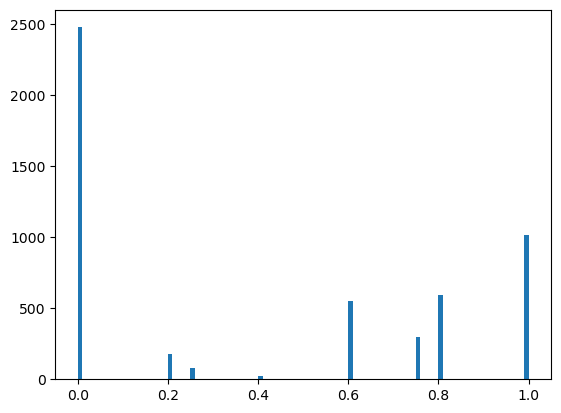

In [112]:
_ = plt.hist(df['s1_lrg_fraction'], bins=100)

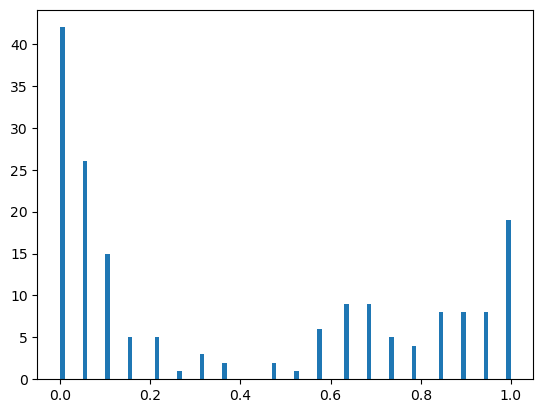

In [113]:
_ = plt.hist(df['s2_lens_fraction'], bins=100)

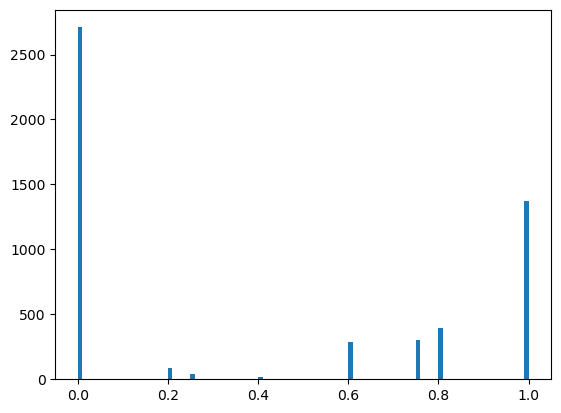

In [114]:
_ = plt.hist(df['s1_spiral_fraction'], bins=100)

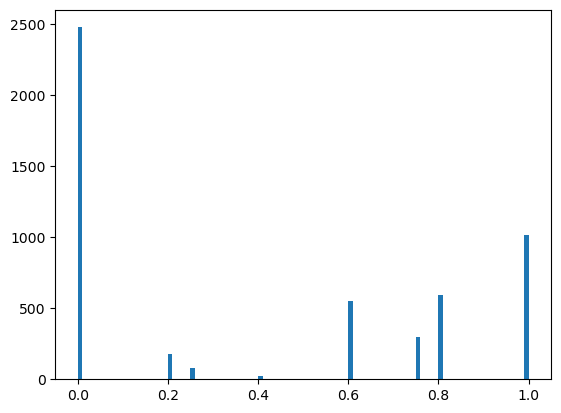

In [115]:
_ = plt.hist(df['s1_lrg_fraction'], bins=100)

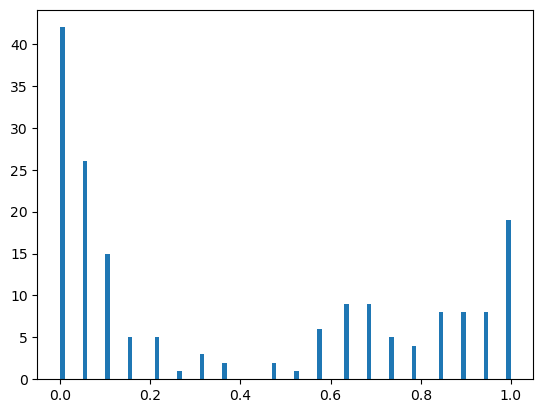

In [117]:
_ = plt.hist(df['s2_lens_fraction'], bins=100)

In [118]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split

# target_col = 's1_lens_fraction'
# target_col = 's1_spiral_fraction'
# target_col = 's1_lrg_fraction'
target_col = 's2_lens_fraction'

df_s = df.dropna(subset=[target_col])
print(len(df_s))

X = df_s[pca_cols].values
y = df_s[target_col].values.reshape(-1, 1) > 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = GradientBoostingRegressor()
# model = RandomForestRegressor()
model = RandomForestClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)



178


/home/walml/miniforge3/envs/zoobot39_dev/lib/python3.9/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6666666666666666

In [119]:
len(y_test)

36

In [120]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[10,  6],
       [ 6, 14]])

In [121]:
# plt.scatter(y_test, model.predict(X_test))

In [122]:
X_train[:3, :5]

array([[ 12.50835019, -11.28355773,  -1.96002613,  -3.25751173,
          0.0426256 ],
       [ -2.96017477,  -0.77093312,  -2.05143477,   8.20962422,
          2.6521359 ],
       [  2.5169355 ,   1.06502044,  -1.09103964,   5.46869965,
         -0.65757813]])

In [123]:
from sklearn.dummy import DummyRegressor, DummyClassifier

In [124]:
# model = DummyRegressor()
model = DummyClassifier()
model.fit(X_train, y_train)

model.score(X_test, y_test)
# coefficient of determination R^2 o

0.5555555555555556

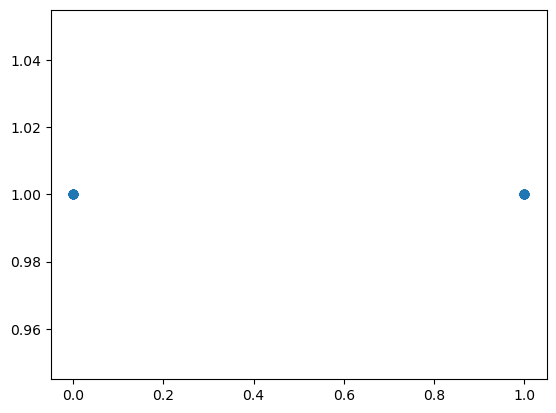

In [125]:
plt.scatter(y_test, model.predict(X_test))

In [126]:
df.iloc[0]

id_str                                                        EUC_0342_DESI-sel
feat_pca_0                                                              6.39443
feat_pca_1                                                             -6.20438
feat_pca_2                                                            -9.036237
feat_pca_3                                                             2.310582
feat_pca_4                                                             -6.27092
feat_pca_5                                                            -5.924473
feat_pca_6                                                             2.046276
feat_pca_7                                                            -4.822285
feat_pca_8                                                             2.522871
feat_pca_9                                                             0.999951
feat_pca_10                                                            2.148692
feat_pca_11                             

In [127]:
df.to_csv('karina_representations_for_junbo_khalid.csv', index=False)